# Making History in Muay Thai: Sylvie's drive to surpass Len Warwick's legendary Boxing Match record of 467 fights. 

> ## Alt Hypothesis: Can Sylvie beat Len Warwick's record? 
>> ### Null Hypothesis: Or maybe not?

##### Project by: Jamaica Noriel (2019)

### 1. **Data Cleaning & Manipulation**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 10.0)

pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', 500)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Importing csv file (Source: Friend of Sylvie and obtained her records via e-mail)

df = pd.read_csv('data/sylvie-fightstats.csv', parse_dates=True)

In [3]:
# Integer-location based indexing for selection by position

df = df.iloc[:,:-1]
df = df.iloc[3:]

In [4]:
# Editing the columns to clean up data

df.columns

Index(['43', 'Legend', 'org ranked or local, world champion', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', '1070.5'],
      dtype='object')

In [5]:
# Setting up columns for clarity

df.columns = [
    'Results',
    'Opponent',
    'Type',
    'Weight(Kg)',
    'Round',
    'Date',
    'Fight No.',
    'Location',
    'Rules'
]

In [6]:
# Data Manipulation of Sylvie's fight data for ease

df["Round"] = df["Round"].fillna(5)
df["Rules"] = df["Rules"].fillna("Muay Thai")
df["Date"] = df["Date"].str.replace('\n', '')
df["Fight No."] = df["Fight No."].str.replace('Boxing', '10')
df["Date"] = df["Date"].str.replace('[0-9]{0,2}/{0,1}[0-9]{1,2}/', '')
df["Date"] = df["Date"].str.replace('217', '2017')
df["Date"] = df["Date"].str.replace('219', '2019')
df = df.sort_index(ascending=0)

# Show results

df.head(30)

,Results,Opponent,Type,Weight(Kg),Round,Date,Fight No.,Location,Rules
257,L,Peeloshmee Deonarain,Decision,110 & under,3,2009,1,"WKA Nationals - Richmond, VA",mod Muay Thai
256,W,(thai),TKO (Knee to Head),NaN,2,2010,2,"Loi Kroh - Chiang Mai, Thailand",Muay Thai
255,W,(thai),TKO (Kick to Body),NaN,2,2010,3,"Loi Kroh - Chiang Mai, Thailand",Muay Thai
254,L,Tori Richardson,Unanimous Decision,51,3,2010,4,"MBK - Bangkok, Thailand (no elbows allowed)",mod Muay Thai
253,W,Min Goodspeed,TKO knees,NaN,2,2010,5,Friday Night Fights (All-Woman's card),mod Muay Thai
252,W,Jessica Ng,Unanimous Decision,46.3,3,2010,6,"Take-On Prods., Queens, NY",mod Muay Thai
251,L,Tanya Lohr,Unanimous Decision,48.9,3,2010,7,"Take-On Prods., Queens, NY",mod Muay Thai
250,L,Peeloshmee Deonarain,Unanimous Decision,48.9,5,2010,8,"Take-On Prods., Queens, NY",mod Muay Thai
249,L,Angela Hill,Unanimous Decision,48.1,3,2011,9,"Friday Night Fights, Manhattan, NY",mod Muay Thai
248,L,Giovanna Camacho,Decision,NaN,4,2011,10,"Gleason's Gym, Brooklyn, NY (All-Woman's card)",Amateur boxing


### 2. **Data Modeling + Visualization (Seaborn)**

In [7]:
# Scatter plot (Line of Best Fit)

import seaborn as sns
%matplotlib inline

# Adds Title and Organizes the Data 

# plt.title("Sylvie Von Duuglas Ittu (No. of Muay Thai Fights vs Time)")
# sns.set_style('whitegrid')
# sns.scatterplot(data=df, x='Date', y='Fight No.')

# Welp, too many datapoints for date :P

In [8]:
# Take 2: Time fix some more data and simplify the data!

array = df[["Date", "Fight No."]].values
prev = 0
offset = 0
newArray = []

# Fixes offset fights

for item in array:
    num = int(item[1])
    if num == prev:
        offset+=1
    prev = num
    newArray.append(num+offset)
    
df["Fight No."] = newArray

# Simplifies the data to be total career fights in a given year

data = []
current_year = ""
current_fights = ""
for item in array:
    year = item[0]
    fightnum = item[1]
    
    if current_year == "":
        current_year = year
        current_fights = fightnum
    elif current_year != year:
        data.append([int(current_year),int(current_fights)])
        current_year = year
    
    current_fights = fightnum
    
# Sets the new data frame for Sylvie

data.append([int(array[-1][0]),int(array[-1][1])])
sylv_data = pd.DataFrame(data, columns = ['Year', 'Fight No.'])
sylv_data

,Year,Fight No.
0,2009,1
1,2010,8
2,2011,11
3,2012,32
4,2013,66
5,2014,101
6,2015,136
7,2016,169
8,2017,205
9,2018,231


### 3. **Visualization of Sylvie's Fight Data**

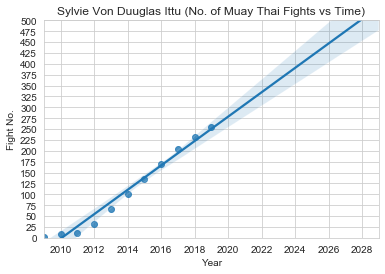

In [15]:
# Sylvie's Data Plot

import matplotlib.ticker as ticker
fig, ax = plt.subplots()
plt.title("Sylvie Von Duuglas Ittu (No. of Muay Thai Fights vs Time)")

xlim = [2009,2029]
ylim = [0,500]

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

sns.set_style("whitegrid")
sns.regplot(x='Year', y='Fight No.', data=sylv_data)

>  Around year 2025, Sylvie should beat Len's fight record of 467 if she keeps up the pace. As a friend and a follower of her journey since 2013, I am sure she'll be able to surpass that :)

### 4. **Visualization of Len's Fight Data**

In [14]:
# Len's Data Frame (Total number of fights per calendar year)

len_data = pd.read_csv('data/len_data.csv')
len_data.columns = [
    'Year',
    "Fights",
    "Fight Total"
]
len_data[['Year', 'Fight Total']]

,Year,Fight Total
0,1928,4
1,1929,31
2,1930,74
3,1931,118
4,1932,168
5,1933,216
6,1934,273
7,1935,326
8,1936,374
9,1937,414


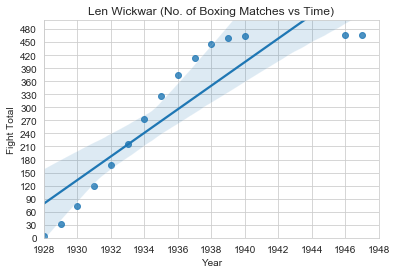

In [10]:
# Len's Data Plot

fig, ax = plt.subplots()
plt.title("Len Wickwar (No. of Boxing Matches vs Time)")

xlim = [1928,1948]
ylim = [0,500]

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(30))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

sns.set_style("whitegrid")
sns.regplot(x='Year', y='Fight Total', data=len_data)

> In 19 years, Len has accomplished a whooping 467 fights. His prime was between 1929-1939; he had a fight record rate per year of 46 fights average during those years. At one point, in 1934, he accomplished 54 times! You can also see that he went on a hiatus/break from 1940-1946 due to WW2 and fought 4 more times before retiring in 1947.

### 5. **[Chi Square] Data Validation if Sylvie can surpass Len's fight record**

In [11]:
from scipy import stats
print(sylv_data["Fight No."].values)
print(len_data["Fight Total"][0:len(sylv_data["Fight No."].values)].values)
stats.chisquare(sylv_data["Fight No."])

[  1   8  11  32  66 101 136 169 205 231 254]
[  4  31  74 118 168 216 273 326 374 414 445]


Power_divergenceResult(statistic=804.1103789126853, pvalue=2.697197314597817e-166)

> Using the chi squared method to valid our data with a p-value of 0.005, the resultant p-value of chi squared method with the given data is less than the p-value we expected. Thus, leading us to believe that our alternative hypothesis is validated. Sylvie should be able to surpass a fight record of ~470 by 2025